In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os
import sys
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import keras
import tensorflow as tf
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [2]:
directory = os.path.join('./data/face_extraction_cv2/')
img_height = 256
img_width = 256
batch_size = 32
nb_epochs = 100

print(directory)

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    directory,
    follow_links=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    directory, # same directory as training data
    follow_links=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

./data/face_extraction_cv2/
Found 1557 images belonging to 2 classes.
Found 388 images belonging to 2 classes.


In [3]:
learning_rate = 0.001

x = Input(shape = (img_width, img_height, 3))

x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

y = Flatten()(x4)
y = Dropout(0.5)(y)
y = Dense(16)(y)
y = LeakyReLU(alpha=0.1)(y)
y = Dropout(0.5)(y)
y = Dense(1, activation = 'sigmoid')(y)

model =  KerasModel(inputs = x, outputs = y)

optimizer = Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])

In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/100
48/48 [==============================] - 44s 684ms/step - loss: 0.3106 - accuracy: 0.5430 - val_loss: 0.3366 - val_accuracy: 0.5078
Epoch 2/100
48/48 [==============================] - 31s 651ms/step - loss: 0.2522 - accuracy: 0.6256 - val_loss: 0.4669 - val_accuracy: 0.5078
Epoch 3/100
48/48 [==============================] - 31s 652ms/step - loss: 0.2388 - accuracy: 0.6452 - val_loss: 0.4673 - val_accuracy: 0.5078
Epoch 4/100
48/48 [==============================] - 31s 644ms/step - loss: 0.2307 - accuracy: 0.6544 - val_loss: 0.4648 - val_accuracy: 0.5052
Epoch 5/100
48/48 [==============================] - 31s 650ms/step - loss: 0.2236 - accuracy: 0.6505 - val_loss: 0.4734 - val_accuracy: 0.5078
Epoch 6/100
48/48 [==============================] - 32s 666ms/step - loss: 0.2259 - accuracy: 0.6643 - val_loss: 0.4243 - val_accuracy: 0.5130
Epoch 7/100
48/48 [==============================] - 34s 701ms/step - loss: 0.2255 - accuracy: 0.6715 - val_loss: 0.3802 - val_accuracy:

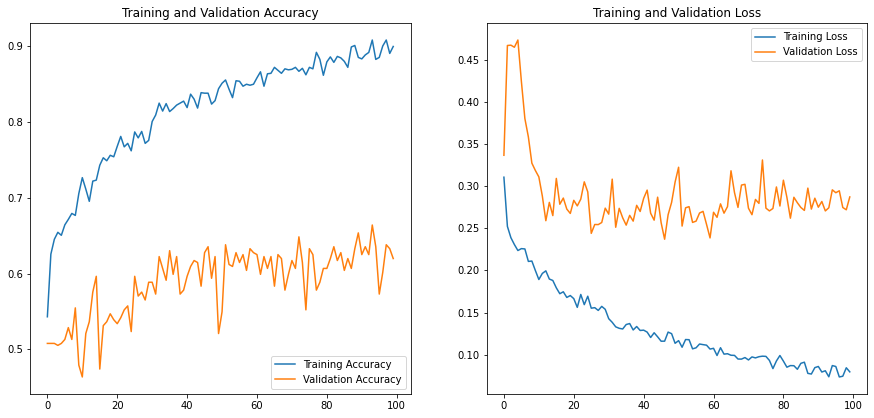

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(nb_epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
df = pd.DataFrame()
for idx, key in enumerate(history.history.keys()):
    row = pd.DataFrame(data={
      'item': key,
      'max': max(history.history[key]),
      'mean': np.mean(history.history[key]),
      'min': min(history.history[key]),
      'std': np.std(history.history[key]),
    }, index=[idx])
    df = pd.concat([df,row])

from IPython.display import HTML
df.sort_values(by=['item'],ascending=True)
HTML(df.to_html(index=False))


item,max,mean,min,std
loss,0.310626,0.130502,0.073649,0.047305
accuracy,0.908197,0.817345,0.542951,0.074695
val_loss,0.473382,0.289775,0.237040,0.045356
val_accuracy,0.664062,0.588203,0.463542,0.044548
